In [1]:
#run: pip install openquantumcomputing
from openquantumcomputing.QAOAMaxCut import QAOAMaxCut

In [2]:
from qiskit import *
import numpy as np
import networkx as nx

import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from qiskit.visualization import *

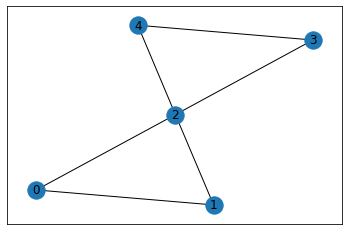

In [3]:
V = np.arange(0,5,1)
E = [(0,1,1.0),(0,2,1.0),(1,2,1.0),(3,2,1.0),(3,4,1.0),(4,2,1.0)] 

G = nx.Graph()
G.add_nodes_from(V)
G.add_weighted_edges_from(E)

pos = nx.spring_layout(G)
nx.draw_networkx(G,pos=pos)
k_cuts=2

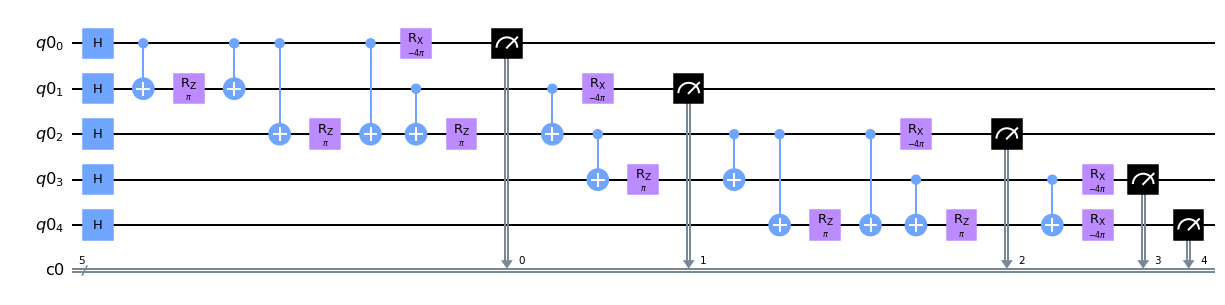

In [4]:
params={'G': G}
qaoamc = QAOAMaxCut()
qaoamc.createCircuit(np.array((np.pi,2*np.pi)),1,params=params).draw(output='mpl')

In [5]:
qasm_sim = Aer.get_backend('qasm_simulator')

In [6]:
qaoamc.sample_cost_landscape(qasm_sim, shots=1024, params=params, angles={"gamma": [0,np.pi/2,10], "beta": [0,np.pi/2,10]})

Calculating Energy landscape for depth p=1...
Calculating Energy landscape done


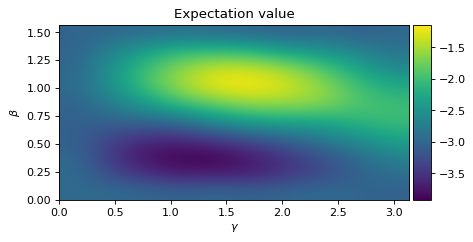

In [7]:
f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Expectation value')
im = ax.imshow(qaoamc.E,interpolation='bicubic',origin='lower',extent=[0,np.pi,0,np.pi/2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

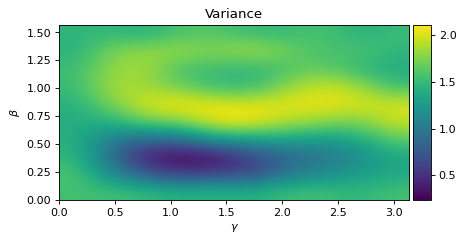

In [8]:
f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Variance')
im = ax.imshow(qaoamc.Var,interpolation='bicubic',origin='lower',extent=[0,np.pi,0,np.pi/2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

In [9]:
maxdepth=10
for i in range(maxdepth):
    qaoamc.increase_depth(qasm_sim, params=params, precision=0.025)

rep= 0 : -3.9238281250000004
rep= 0 : -3.8984375
rep= 0 : -3.95703125
rep= 0 : -3.9687499999999996
rep= 0 : -3.962890625
rep= 0 : -3.96484375
rep= 0 : -3.9707031249999996
rep= 0 : -3.9902343750000004
rep= 0 : -3.9765625000000004
rep= 0 : -3.9003906250000004


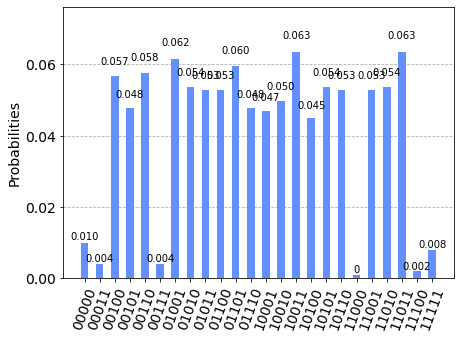

In [10]:
hist=qaoamc.hist(qaoamc.angles_hist['d'+str(maxdepth)+'_final'], qasm_sim,1024, params=params)
plot_histogram(hist)

In [11]:
import itertools
state_strings = np.array([''.join(i) for i in itertools.product('01', repeat= G.number_of_nodes())])
mincost=0
for st in state_strings:
    mincost=min(mincost,-qaoamc.cost(st,params=params))
print("minimum cost=",mincost)

minimum cost= -4.0


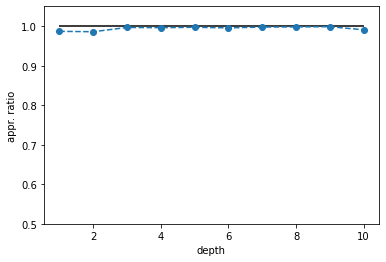

In [12]:
pl.plot(np.arange(1,maxdepth+1), np.array(list(qaoamc.costval.values()))/mincost,'o--')
pl.hlines(1, 1,maxdepth, linestyles="solid", colors="black")
pl.ylim(0.5,1.05)
_=pl.ylabel('appr. ratio')
_=pl.xlabel('depth')

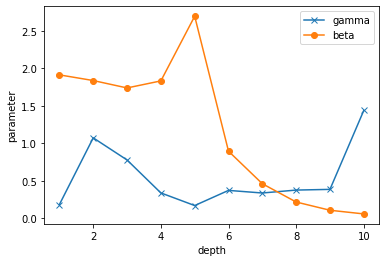

In [13]:
pl.plot(np.arange(1,maxdepth+1),qaoamc.angles_hist['d'+str(maxdepth)+'_final'][::2],"x-",label='gamma')
pl.plot(np.arange(1,maxdepth+1),qaoamc.angles_hist['d'+str(maxdepth)+'_final'][1::2],"o-",label='beta')
_=pl.ylabel('parameter')
_=pl.xlabel('depth')
_=pl.legend()

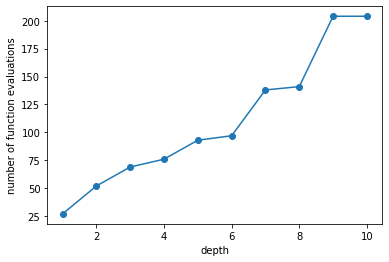

In [14]:
_=pl.plot(np.arange(1,maxdepth+1),qaoamc.num_fval.values(),"o-")
_=pl.ylabel('number of function evaluations')
_=pl.xlabel('depth')

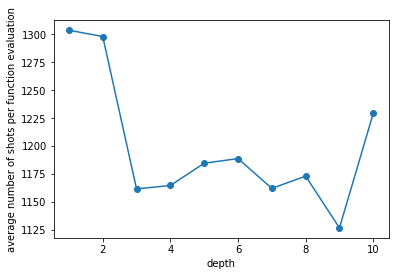

In [15]:
_=pl.plot(np.arange(1,maxdepth+1),np.array(list(qaoamc.num_shots.values()))/np.array(list(qaoamc.num_fval.values())),"o-")
_=pl.ylabel('average number of shots per function evaluation')
_=pl.xlabel('depth')